
# Resolución del Ejercicio 4: Método de Escalada Simple y Máxima Pendiente

Este notebook resuelve el ejercicio de la imagen proporcionada utilizando dos algoritmos de búsqueda heurística: **Escalada Simple** y **Escalada por Máxima Pendiente**.

## Contexto del problema
Dado un grafo con valores heurísticos asociados, debemos encontrar un camino desde un nodo inicial (`A`) hacia uno de los nodos solución (`L` o `Z`) usando ambos métodos.

**Consideraciones:**
- Los nodos `L` y `Z` son solución al problema.
- Cuanto mayor sea el valor heurístico, más "deseable" es el nodo.
- Los nodos se recorren de izquierda a derecha.

---

A continuación, se explican los pasos realizados para resolver el problema.


---
### Instalación de Dependencias
Para poder trabajar con las bibliotecas necesarias, primero debemos instalar `networkx`. Ejecuta el siguiente comando:

In [1]:
pip install networkx

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: C:\Users\j2a0a\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


---

### Importación de Bibliotecas
En este paso, importamos las bibliotecas necesarias y realizamos una limpieza opcional de la consola para mayor claridad.

In [2]:

# Importar bibliotecas necesarias
import networkx as nx
import matplotlib.pyplot as plt
import os

# Limpiar consola (opcional para ejecución en terminal)
os.system('cls' if os.name == 'nt' else 'clear')


0

---

### Definición de Algoritmos de Búsqueda
A continuación, definimos dos algoritmos: **Escalada por Máxima Pendiente** y **Escalada Simple**. Estos se utilizarán para encontrar caminos óptimos en el grafo.

In [3]:

def escalada_por_maxima_pendiente(grafo, inicio, nodos_finales):
    nodo_actual = inicio
    camino_actual = [nodo_actual]
    peso_actual = 0
    
    while True:
        # Obtener los vecinos del nodo actual
        vecinos = list(grafo.neighbors(nodo_actual))
        
        # Evaluar las opciones basadas en el peso de los bordes
        opciones = []
        for vecino in vecinos:
            if vecino not in camino_actual:  # Evitar ciclos
                peso_borde = grafo[nodo_actual][vecino].get('weight', 1)
                opciones.append((vecino, peso_borde))
        
        if not opciones:
            # No hay vecinos disponibles, detenerse
            break
        
        # Elegir el vecino con el mayor peso de borde
        mejor_opcion = max(opciones, key=lambda x: x[1])
        siguiente_nodo, siguiente_peso = mejor_opcion
        
        # Si el siguiente nodo es uno de los finales, detenerse
        if siguiente_nodo in nodos_finales:
            camino_actual.append(siguiente_nodo)
            peso_actual += siguiente_peso
            break
        
        # Si el borde tiene peso infinito, detenerse
        if siguiente_peso == float('inf'):
            break
        
        # Actualizar el estado actual
        camino_actual.append(siguiente_nodo)
        peso_actual += siguiente_peso
        nodo_actual = siguiente_nodo

    return camino_actual, peso_actual

def escalada(grafo, inicio, nodos_finales):
    nodo_actual = inicio
    camino_actual = [nodo_actual]
    peso_actual = 0
    
    while True:
        # Obtener los vecinos del nodo actual
        vecinos = list(grafo.neighbors(nodo_actual))
        
        # Evaluar las opciones basadas en el peso de los bordes
        opciones = []
        for vecino in vecinos:
            if vecino not in camino_actual:  # Evitar ciclos
                peso_borde = grafo[nodo_actual][vecino].get('weight', 1)
                opciones.append((vecino, peso_borde))
        
        if not opciones:
            # No hay vecinos disponibles, detenerse
            break
        
        # Elegir el vecino con el mayor peso de borde
        siguiente_vecino, siguiente_peso = max(opciones, key=lambda x: x[1])
        
        # Si el siguiente nodo es uno de los finales, detenerse
        if siguiente_vecino in nodos_finales:
            camino_actual.append(siguiente_vecino)
            peso_actual += siguiente_peso
            break
        
        # Si el borde tiene peso infinito, detenerse
        if siguiente_peso == float('inf'):
            break
        
        # Actualizar el estado actual
        camino_actual.append(siguiente_vecino)
        peso_actual += siguiente_peso
        nodo_actual = siguiente_vecino

    return camino_actual, peso_actual


---

### Creación del Grafo
Aquí se construye el grafo con los nodos y los bordes definidos, junto con sus pesos.

In [4]:

# Creación del grafo basado en el problema

grafo = nx.Graph()

edges = [
    ("A", "D", 1),
    ("A", "Q", 3),
    ("A", "G", 2),
    ("D", "B", 3),
    ("D", "J", 4),
    ("Q", "C", 4),
    ("Q", "E", 6),
    ("C", "W", 8),
    ("C", "P", 4),
    ("E", "Z", float('inf')),
    ("E", "F", 6),
    ("J", "H", 4),
    ("J", "K", 5),
    ("K", "L", float('inf')),
]

grafo.add_weighted_edges_from(edges)

# Definir posiciones manuales para los nodos
pos = {
    "A": (0, 5),
    "D": (-3, 4),
    "Q": (0, 4),
    "G": (3, 4),
    "B": (-4, 3),
    "J": (-2, 3),
    "C": (-1, 3),
    "E": (2, 3),
    "H": (-4, 2),
    "K": (-2, 2),
    "L": (-1, 1),
    "W": (-1, 2),
    "P": (0, 2),
    "Z": (2, 2),
    "F": (3, 2),
}


---

### Ejecución de los Algoritmos
Ahora probamos los algoritmos de búsqueda definidos anteriormente en el grafo.

In [5]:

# Ejecutar los algoritmos desde el nodo inicial 'A' hacia los nodos finales 'L' y 'Z'

start_node = "A"
end_nodes = {"Z", "L"}

print("Escalada Simple:")
path, weight = escalada(grafo, start_node, end_nodes)
print("Camino encontrado:", path)
print("Peso total del camino:", weight)

print("\nEscalada por Máxima Pendiente:")
path, weight = escalada_por_maxima_pendiente(grafo, start_node, end_nodes)
print("Camino encontrado:", path)
print("Peso total del camino:", weight)


Escalada Simple:
Camino encontrado: ['A', 'Q', 'E', 'Z']
Peso total del camino: inf

Escalada por Máxima Pendiente:
Camino encontrado: ['A', 'Q', 'E', 'Z']
Peso total del camino: inf


---

### Visualización del Grafo
Por último, mostramos el grafo con sus pesos utilizando `matplotlib`.

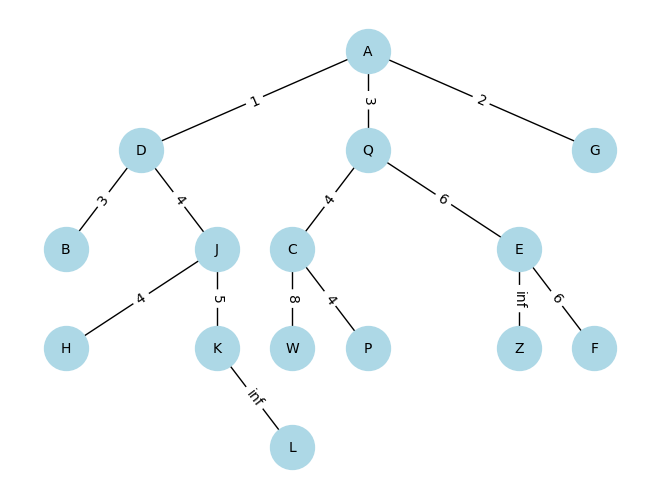

In [6]:

# Dibujar el grafo con pesos de los bordes
nx.draw(grafo, pos, with_labels=True, node_color="lightblue", node_size=1000, font_size=10)
weights = nx.get_edge_attributes(grafo, 'weight')
nx.draw_networkx_edge_labels(grafo, pos, edge_labels=weights)
plt.show()
